In [1]:
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
import numpy as np
import csv
from scipy import stats
import trompy as tp

# %run ..//JM_custom_figs.py
%matplotlib inline

In [2]:
# fig settings
scattersize=50
colors = ['darkturquoise','dodgerblue', 'darkblue']

In [3]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"
statsfolder = "C:\\Github\\Distraction-Paper\\stats\\"

try:
    pickle_in = open(datafolder + "distraction_data_only_snips.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [4]:
# thph2.8 removed from analysis because no data on habituation day

modDict.pop('thph2.8')
disDict.pop('thph2.8')
;

''

In [5]:
# adds parameters used for figures - no. of distractors, distracted, not distracted and calculates probability of distraction

for day in [modDict, disDict, habDict]:
    rats = day.keys()
    for rat in rats:
        d = day[rat]
        # check that numbers add up
        d ['#ds'] =len(d['distractors'])
        d ['#distracted'] =len(d['distracted'])
        d ['#not-dis'] =len(d['notdistracted'])   
        if d['#not-dis'] + d['#distracted'] == d['#ds']:
            d['prob-distracted'] = d['#distracted'] / d['#ds']
        else:
            print("Something wrong in the number of distracted and non-distracted trials")


In [6]:
def find_tercile_prob(d, verbose=False):
    """ Finds probability distracted for each tercile from distraction data dictionary
    
    Args
    d - dictionary with distraction data
    
    Returns
    tercile_prob_distracted - list of 3 values"""
    
    tercile_length = int(np.round((d["#ds"] / 3)))
    tercile_length_array = [tercile_length, d["#ds"] - tercile_length*2, tercile_length]

    dba = d["d_bool_array"]
    t1 = sum(dba[:tercile_length_array[0]])
    t2 = sum(dba[tercile_length_array[0]:tercile_length_array[1]+tercile_length_array[0]])
    t3 = sum(dba[tercile_length_array[1]+tercile_length_array[0]:])

    tercile_prob_distracted = []
    for t_sum, t_len in zip([t1, t2, t3], tercile_length_array):
        tercile_prob_distracted.append(t_sum / t_len)


    if sum([t1, t2, t3]) != len(d["distracted"]):
        print("Check tercile calculation")
        
    if verbose:
        print(d["rat"], sum([t1, t2, t3]), len(d["distracted"]), len(d["notdistracted"]), print(sum(dba)))
        print("Tercile length array", tercile_length_array)
        print("Number of distractors", d["#ds"])
        print(dba)
        print("Tercile probability of distraction", tercile_prob_distracted)
        print("Number of Trues in each tercile", t1, t2, t3)
        print("\n")
        
    return tercile_prob_distracted

rats = modDict.keys()

all_tercile_probs = []
for rat in rats:
    t_probs = []
    t_probs.append(find_tercile_prob(modDict[rat]))
    t_probs.append(find_tercile_prob(disDict[rat]))
    t_probs.append(find_tercile_prob(habDict[rat]))
    
    all_tercile_probs.append(tp.flatten_list(t_probs))

# d = disDict['thph2.3']
# aaa = find_tercile_prob(d, verbose=True)

C:\ProgramData\Anaconda3\envs\dis\lib\site-packages\scipy\stats\stats.py:3233: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / dfbn


F_onewayResult(statistic=array([nan, nan, nan, nan, nan, nan, nan, nan, nan]), pvalue=array([nan, nan, nan, nan, nan, nan, nan, nan, nan]))

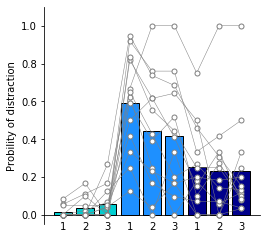

In [7]:
all_tercile_probs_array = np.array(all_tercile_probs)

colors_triple = [colors[0], colors[0], colors[0],
                 colors[1], colors[1], colors[1],
                 colors[2], colors[2], colors[2]]

f, ax = plt.subplots(figsize=(4,4))
f.subplots_adjust(left=0.15)
_, barx, _, _ = tp.barscatter(all_tercile_probs_array.T, paired=True,
           barfacecolor=colors_triple, barfacecoloroption='individual',
           scattersize=scattersize,
           ax=ax)

ax.set_ylabel("Probility of distraction")
ax.set_ylim([-0.05, 1.1])

ax.set_xticks(barx)
ax.set_xticklabels(["1", "2", "3", "1", "2", "3", "1", "2", "3"])

f.savefig(figfolder + "tercile_analysis_prob.pdf")

from scipy.stats import f_oneway

f_oneway(all_tercile_probs)

In [8]:
def find_tercile_aucs(d, epoch=[60, 90], signal="filt_z"):
    """ Finds probability distracted for each tercile from distraction data dictionary
    
    Args
    d - dictionary with distraction data from single rat
    
    Returns
    tercile_prob_distracted - list of 3 values"""
    
    tercile_length = int(np.round((d["#ds"] / 3)))
    tercile_length_array = [tercile_length, d["#ds"] - tercile_length*2, tercile_length]

    snips = d["snips_distractors"][signal]
    t1 = [np.mean(snip[epoch[0]:epoch[1]]) for snip in snips[:tercile_length_array[0]]]
    t2 = [np.mean(snip[epoch[0]:epoch[1]]) for snip in snips[tercile_length_array[0]:tercile_length_array[1]+tercile_length_array[0]]]
    t3 = [np.mean(snip[epoch[0]:epoch[1]]) for snip in snips[tercile_length_array[1]+tercile_length_array[0]:]]
    
    
    tercile_aucs = []
    for t in [t1, t2, t3]:
        tercile_aucs.append(np.mean(t))
    
    return tercile_aucs

rats = modDict.keys()

all_tercile_aucs = []
for rat in rats:
    t_aucs= []
    t_aucs.append(find_tercile_aucs(modDict[rat]))
    t_aucs.append(find_tercile_aucs(disDict[rat]))
    t_aucs.append(find_tercile_aucs(habDict[rat]))
    
    all_tercile_aucs.append(tp.flatten_list(t_aucs))

# d = disDict['thph2.3']
# find_tercile_aucs(d)

C:\ProgramData\Anaconda3\envs\dis\lib\site-packages\scipy\stats\stats.py:3233: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / dfbn


F_onewayResult(statistic=array([nan, nan, nan, nan, nan, nan, nan, nan, nan]), pvalue=array([nan, nan, nan, nan, nan, nan, nan, nan, nan]))

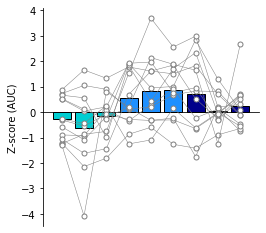

In [9]:
all_tercile_aucs_array = np.array(all_tercile_aucs)

colors_triple = [colors[0], colors[0], colors[0],
                 colors[1], colors[1], colors[1],
                 colors[2], colors[2], colors[2]]

f, ax = plt.subplots(figsize=(4,4))
f.subplots_adjust(left=0.15)
_, barx, _, _ = tp.barscatter(all_tercile_aucs_array.T, paired=True,
           barfacecolor=colors_triple, barfacecoloroption='individual',
           scattersize=scattersize,
           ax=ax)

ax.set_ylabel("Z-score (AUC)")
# ax.set_ylim([-0.05, 1.1])

# ax.set_xticks(barx)
# ax.set_xticklabels(["1", "2", "3", "1", "2", "3", "1", "2", "3"])

f.savefig(figfolder + "tercile_analysis_aucs.pdf")

from scipy.stats import f_oneway

f_oneway(all_tercile_probs)

In [10]:
dis_probs = all_tercile_probs_array[:,3:6]
dis_aucs = all_tercile_aucs_array[:,3:6]

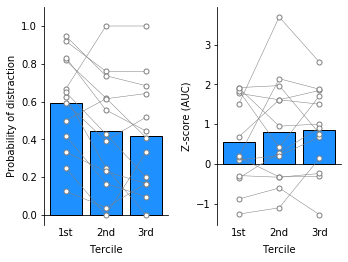

In [22]:
f, [ax1, ax2] = plt.subplots(ncols=2, figsize=(5.5,4))
f.subplots_adjust(left=0.15, wspace=0.4)


_, barx, _, _ = tp.barscatter(dis_probs.T, paired=True,
              barfacecolor=[colors[1]], barfacecoloroption='same',
              scattersize=scattersize,
              ax=ax1)

tp.barscatter(dis_aucs.T, paired=True,
              barfacecolor=[colors[1]], barfacecoloroption='same',
              scattersize=scattersize,
              ax=ax2)

ax1.set_ylabel("Probability of distraction")
ax2.set_ylabel("Z-score (AUC)")

ax1.set_ylim([-0.05, 1.1])

barlabels=['1st', '2nd', '3rd']

for axis in [ax1, ax2]:
    trans = transforms.blended_transform_factory(
                axis.transData, axis.transAxes)
    for x, label in zip(barx, barlabels):
        axis.text(x, -0.05, label, ha="center", transform=trans)
    axis.text(barx[1], -0.13, "Tercile", ha="center", transform=trans)
        
f.savefig(figfolder + "within_session_hab.pdf")

In [29]:
import pandas as pd
from statsmodels.stats.anova import AnovaRM

rats = disDict.keys()
data = np.array(dis_probs, dtype="float")


df = pd.DataFrame(data, columns=["1", "2", "3"], index=rats)
df.insert(0, "ratid", rats)
df = df.melt(id_vars = "ratid")

aovrm = AnovaRM(df, "value", "ratid", within=["variable"])
res = aovrm.fit()

print(res)
t, p = stats.ttest_rel(dis_probs.T[0], dis_probs.T[1])
print('1 v 2', t, p, "Sidak:", tp.sidakcorr(p))

t, p = stats.ttest_rel(dis_probs.T[0], dis_probs.T[2])
print('1 v 3', t, p, "Sidak:", tp.sidakcorr(p))

t, p = stats.ttest_rel(dis_probs.T[1], dis_probs.T[2])
print('2 v 3', t, p, "Sidak:", tp.sidakcorr(p))

data = np.array(dis_aucs, dtype="float")


df = pd.DataFrame(data, columns=["1", "2", "3"], index=rats)
df.insert(0, "ratid", rats)
df = df.melt(id_vars = "ratid")

aovrm = AnovaRM(df, "value", "ratid", within=["variable"])
res = aovrm.fit()

print(res)

                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable  5.0127 2.0000 24.0000 0.0152

1 v 2 2.8236282257268974 0.015356220065884196 Sidak: 0.04536484091743631
1 v 3 2.29752885513493 0.04037776743507989 Sidak: 0.11630804045870269
2 v 3 0.637804302216334 0.5355821448177593 Sidak: 0.8998325252317831
                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable  0.7818 2.0000 24.0000 0.4689



In [27]:
dis_probs.T[0]

array([0.59259259, 0.92      , 0.66666667, 0.65      , 0.41935484,
       0.25      , 0.94736842, 0.125     , 0.81818182, 0.33333333,
       0.5       , 0.83333333, 0.625     ])

In [ ]:
dis_terciles = []
for rat in all_tercile_probs:
    dis_terciles.append(rat[3:6])
    
dis_terciles

import pandas as pd
df = pd.DataFrame(dis_terciles)

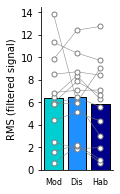

In [37]:
def get_rms(daydict):
    
    """ Gets rms for all rats"""
    rms = []

    rats = daydict.keys()
    for rat in rats:
        d = daydict[rat]
        rms.append(d["rms"])
        
    return rms

rms_mod = get_rms(modDict)
rms_dis = get_rms(disDict)
rms_hab = get_rms(habDict)


f, ax = plt.subplots(figsize=(2,3))
f.subplots_adjust(left=0.4)
tp.barscatter([rms_mod, rms_dis, rms_hab], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           barlabels=['Mod', 'Dis', 'Hab'],
           barlabeloffset=0.05,
           scattersize=scattersize,
           ax=ax)

ax.set_ylabel('RMS (filtered signal)')
ax.set_xticks([])
# ax.set_xticks([1,2,3])
# ax.set_xticklabels(['Mod', 'Dis', 'Hab'])
# ax.set_ylim([-0.1, 1.1])

f.savefig(figfolder+"figs5_rms.pdf")


